# Basic_RNN

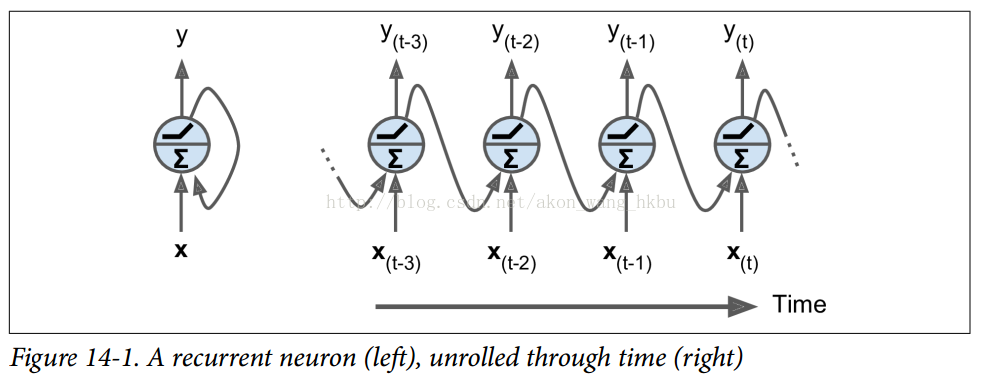

In [1]:
from IPython.display import Image
Image(filename="img/basic_RNN_structure.png", width=800, height=400)

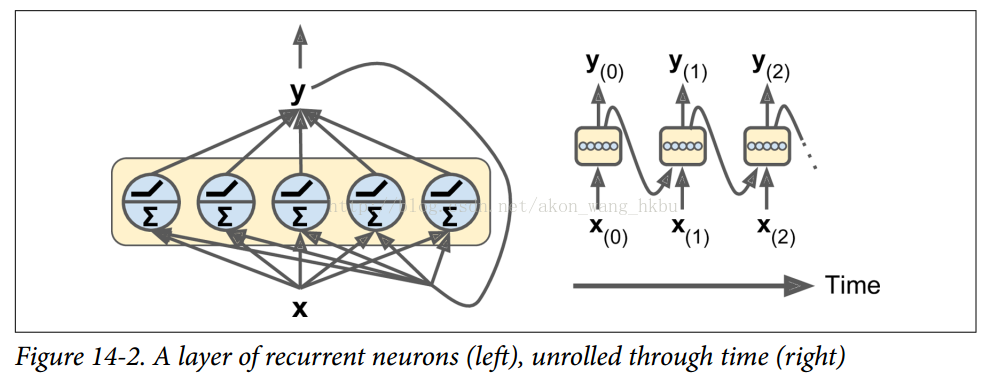

In [2]:
Image(filename="img/rnn_with_5 neurons_in_hidden_layer.png", width = 800, height=400)

Let simplify the model for a clearer illustration:

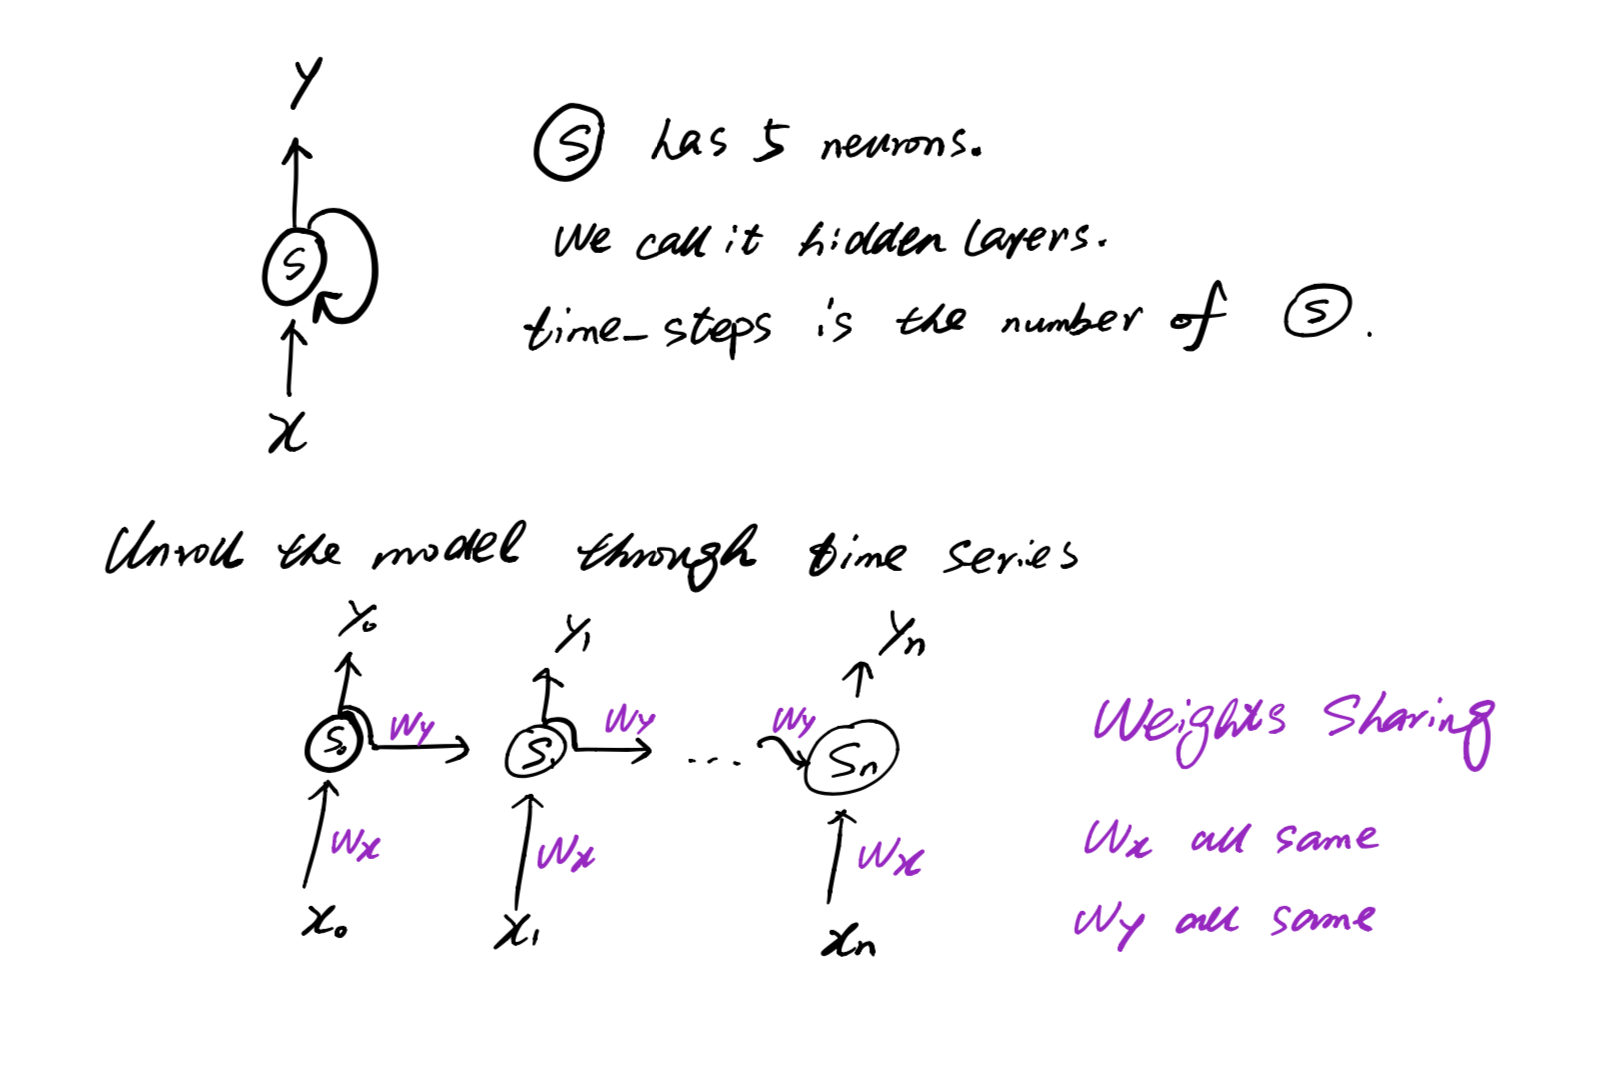

In [3]:
Image(filename = "img/manual_draw_simplified_basicRNN.png", width=800, height=400)
# here, the time_step in this example is 2, aka t starts from 0, 1 to 2.

timesteps = 2; each input vector x inputs 3, for example, x0 could be [1, 2, 3], x1 could be [4, 5, 6];

and for each cell, there are 5 neurons inside

In [4]:
import tensorflow as tf
import numpy as np


n_inputs = 3
n_neurons = 5

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

Wx = tf.Variable(tf.random_normal(shape = [n_inputs, n_neurons], dtype = tf.float32))
Wy = tf.Variable(tf.random_normal(shape = [n_neurons, n_neurons], dtype = tf.float32))
b = tf.Variable(tf.zeros(shape = [1, n_neurons], dtype = tf.float32))

Y0 = tf.tanh(tf.matmul(X0, Wx) + b)
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b)

init = tf.global_variables_initializer()

In [5]:
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]]) # t = 0
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]]) # t = 1

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict = {X0: X0_batch, X1: X1_batch})

In [6]:
print(Y0_val)
print()
print(Y1_val)

[[-0.06616583 -0.99371946  0.9693864  -0.6029623  -0.58583444]
 [-0.99892235 -0.9999989   0.9953209   0.76785606 -0.22939654]
 [-0.9999994  -1.          0.99929273  0.9914943   0.20140363]
 [-1.         -0.99778414  0.90562695  0.99999934  0.9999856 ]]

[[-1.         -1.         -0.40860868  0.9999968   0.99579185]
 [ 0.6772836  -0.9888854   0.15034008  0.9716721   0.9888359 ]
 [-0.99999416 -0.99999976 -0.05313068  0.99998695  0.99985427]
 [-0.976603   -0.9967855  -0.93299186  0.9964777   0.99992245]]


# Static_RNN (the length of timesteps in basic RNN model is fixed)

In [1]:
import tensorflow as tf
import numpy as np
n_inputs = 3
n_neurons = 5

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

# the different between this code and last piece of code occurs from this line
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units = n_neurons)

# static_rnn() returns to two obejects: the first of which a Python list containing the output tensor for each time step.
#   and the second of object is a tensor containing the final states of the network. 
# Here, the 1st object is output_seqs, the 2nd object is states. And for basic RNN, the final states is simply the 
#   last output.
output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, [X0, X1], dtype = tf.float32)

Y0, Y1 = output_seqs

# the rest code shall be the same as I showed in Basic_RNN part.
init = tf.global_variables_initializer()

X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]]) # t = 0
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]]) # t = 1

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict = {X0: X0_batch, X1: X1_batch})

print(Y0_val)
print()
print(Y1_val)

[[-0.7614606  -0.34155566 -0.16727635  0.59812605  0.6621669 ]
 [-0.9991632  -0.12357409 -0.87912285  0.9364047   0.94680256]
 [-0.99999756  0.10702329 -0.9884663   0.9914582   0.9926794 ]
 [-0.9999869   0.9999648  -0.99993944  0.56429106 -0.9802485 ]]

[[-0.9999998   0.3850399  -0.9990563   0.9607908   0.83588624]
 [-0.881437   -0.66844887 -0.48739776 -0.40963647 -0.91927993]
 [-0.99999243  0.03801944 -0.99190235  0.75672096 -0.42837277]
 [-0.9912291   0.88792056 -0.5443138   0.8049113  -0.3552371 ]]


# Dynamic RNN

 (Unroll RNN in time series dynamically. The length of timesteps in basic RNN model is not fixed)

In [1]:
import tensorflow as tf
# packing the unfixed sequences aka the length of timesteps.
n_steps = 2
n_inputs = 3
n_neurons = 5

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
X_seqs = tf.unstack(tf.transpose(X, perm = [1, 0, 2]))

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, X_seqs, dtype =tf.float32)
outputs = tf.transpose(tf.stack(output_seqs), perm = [1, 0, 2])

init = tf.global_variables_initializer()

import numpy as np
X_batch = np.array([
                   # t = 0    t = 1
                    [[0, 1, 2], [9, 8, 7]],  # instance 1
                    [[3, 4, 5], [0, 0, 0]],  # instance 2
                    [[6, 7, 8], [6, 5, 4]],  # instance 3
                    [[9, 0, 1], [3, 2, 1]],  # instance 4
                   ])
with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict = {X: X_batch})
    
print(outputs_val)

print()

[[[ 0.948088    0.62043124  0.6402524  -0.03246959 -0.38638717]
  [ 1.          0.9999975   0.9999128   0.9972756  -0.9921185 ]]

 [[ 0.9999987   0.99818814  0.98925644  0.79158545 -0.90949434]
  [-0.71815825 -0.89940834  0.19933756 -0.14196599 -0.01821689]]

 [[ 1.          0.99999297  0.99973404  0.9749547  -0.98989964]
  [ 0.99999964  0.99712133  0.996327    0.9703715  -0.9543939 ]]

 [[ 0.99995524  0.9939876   0.99985033  0.1720892  -0.99923056]
  [ 0.99481     0.6082286   0.893735    0.7275127  -0.6541569 ]]]



Using dynamic_rnn

In [1]:
import tensorflow as tf
import numpy as np

n_steps = 2
n_inputs = 3
n_neurons = 5

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype =tf.float32)

init = tf.global_variables_initializer()

import numpy as np
X_batch = np.array([
                   # t = 0    t = 1
                    [[0, 1, 2], [9, 8, 7]],  # instance 1
                    [[3, 4, 5], [0, 0, 0]],  # instance 2
                    [[6, 7, 8], [6, 5, 4]],  # instance 3
                    [[9, 0, 1], [3, 2, 1]],  # instance 4
                   ])
with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict = {X: X_batch})
    
print(outputs_val)

[[[-0.15014076 -0.92232054  0.8223671   0.42602324 -0.5435306 ]
  [-0.8125058  -1.          0.99996954  0.9999931  -0.95819014]]

 [[-0.6843426  -0.9999683   0.9977364   0.9898146  -0.9041111 ]
  [ 0.60132706 -0.72023296  0.04443507  0.31186512  0.27703768]]

 [[-0.9092518  -1.          0.9999738   0.9998697  -0.98299503]
  [-0.5517405  -0.9999989   0.9968022   0.999589   -0.63633907]]

 [[-0.93318516 -0.999219    0.7722618   0.9971522  -0.85934377]
  [-0.04551259 -0.9970332   0.7724938   0.95830226  0.15023863]]]


# Setting the sequence length

In [2]:
print("Ready to be filled in...")

Ready to be filled in...
